In [77]:
from keras.models import Model, load_model
import matplotlib.pyplot as plt
import numpy
import cv2
import numpy as np
import dlib
import os
import pickle

In [78]:
img_size = 160
detector = dlib.get_frontal_face_detector()

In [79]:
# Importing the FaceNet pre-trained model
model = load_model('C:/Users/Saran/.keras/models/facenet_keras.h5')

d:\python 3.6\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [80]:
def takePhoto(fileName):
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.imwrite(fileName + '.jpg', frame)
            break

    cap.release()
    cv2.destroyAllWindows()

In [81]:
takePhoto('anchor') # Positive picture to be verified
positive_img = cv2.imread('anchor.jpg')
det = detector(positive_img, 1)
d = det[0] # Face with best score
positive_img = cv2.resize(positive_img[d.top(): d.bottom(), d.left(): d.right()], (img_size, img_size))

takePhoto('positive') # Anchor of positive
anchor_img = cv2.imread('positive.jpg')
det = detector(anchor_img, 1)
d = det[0] # Face with best score
anchor_img = cv2.resize(anchor_img[d.top(): d.bottom(), d.left(): d.right()], (img_size, img_size))

takePhoto('negative') # Negative picture
negative_img = cv2.imread('negative.jpg')
det = detector(negative_img, 1)
d = det[0] # Face with best score
negative_img = cv2.resize(negative_img[d.top(): d.bottom(), d.left(): d.right()], (img_size, img_size))

In [82]:
# Embedding the anchor
def embedIt(fileName):
    img = cv2.imread(fileName + '.jpg')
    img_real = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_cropped = cv2.resize(img_real, (img_size, img_size))
    embed = model.predict(img_cropped.reshape(-1, img_size, img_size, 3))
    
    return embed

In [83]:
anchor = embedIt('anchor')
positive = embedIt('positive')
negative = embedIt('negative')

Anchor-positive distance: 3.0993103981018066
Anchor-negative distance: 6.177243232727051


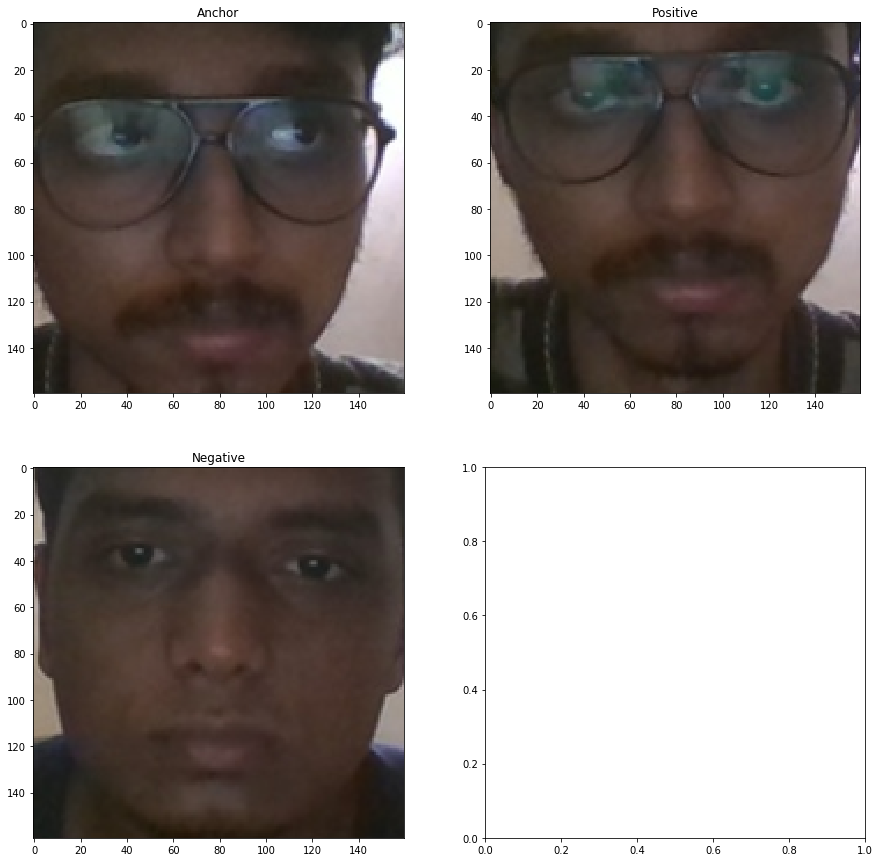

In [84]:
fig, ax = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
if np.linalg.norm(anchor - positive) < np.linalg.norm(anchor - negative):
    ax[0, 0].imshow(cv2.cvtColor(anchor_img, cv2.COLOR_BGR2RGB))
    ax[0, 0].set_title('Anchor')
    ax[0, 1].imshow(cv2.cvtColor(positive_img, cv2.COLOR_BGR2RGB))
    ax[0, 1].set_title('Positive')
    ax[1, 0].imshow(cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB))
    ax[1, 0].set_title('Negative')
else:
    print('invalid')

print('Anchor-positive distance: {}'.format(np.linalg.norm(anchor - positive)))
print('Anchor-negative distance: {}'.format(np.linalg.norm(anchor - negative)))